 ## Imports 


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import randrange
import statistics  as sts



pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Import Data 
Change datatype to float and replace commata with dots

In [4]:
df = pd.read_csv("Covid.csv")
df.columns = ["Id","Country","TotalCases","TotalDeaths","NewDeaths","TotalRecovered","ActiveCases","SeriousCritical","TotCases1Mpop","Deaths1Mpop","TotalTests","Tests1Mpop","Population"]
df = df.set_index("Id")

df.dtypes
col = df.select_dtypes(include = "object").columns
col = col[ col != 'Country']


df['TotalCases'] = df['TotalCases'].str.replace(",", "").astype(float)
df['SeriousCritical'] = df['SeriousCritical'].str.replace(",", "").astype(float)
df['Tests1Mpop'] = df['Tests1Mpop'].str.replace(",", "").astype(float)
df[ 'TotalDeaths'] = df[ 'TotalDeaths'].str.replace(",", "").astype(float)
df[ 'TotCases1Mpop'] = df[ 'TotCases1Mpop'].str.replace(",", "").astype(float)
df[ 'Population'] = df[ 'Population'].str.replace(",", "").astype(float)
df[ 'TotalRecovered'] = df[ 'TotalRecovered'].str.replace(",", "").astype(float)
df[ 'Deaths1Mpop'] = df[ 'Deaths1Mpop'].str.replace(",", "").astype(float)
df[ 'ActiveCases'] = df[ 'ActiveCases'].str.replace(",", "").astype(float)
df[ 'TotalTests'] = df[ 'TotalTests'].str.replace(",", "").astype(float)

columns = df.columns
columns = list(columns)

# First Look at data


In [5]:
df.head()

,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population
Id,,,,,,,,,,,,
1,USA,98166904.000,1084282.000,NaN,94962112.000,2120510.000,2970.000,293206.000,3239.000,1118158870.000,3339729.000,334805269.000
2,India,44587307.000,528629.000,NaN,44019095.000,39583.000,698.000,31698.000,376.000,894416853.000,635857.000,1406631776.000
3,France,35342950.000,155078.000,NaN,34527115.000,660757.000,869.000,538892.000,2365.000,271490188.000,4139547.000,65584518.000
4,Brazil,34706757.000,686027.000,NaN,33838636.000,182094.000,8318.000,161162.000,3186.000,63776166.000,296146.000,215353593.000
5,Germany,33312373.000,149948.000,NaN,32315200.000,847225.000,1406.000,397126.000,1788.000,122332384.000,1458359.000,83883596.000


In [6]:
df.isnull().sum()

Country              0
TotalCases           0
TotalDeaths          5
NewDeaths          227
TotalRecovered      16
ActiveCases         15
SeriousCritical     83
TotCases1Mpop        2
Deaths1Mpop          7
TotalTests          16
Tests1Mpop          16
Population           2
dtype: int64

In [7]:
df['NewDeaths'].fillna(0, inplace=True)
df['TotalDeaths'].fillna(sts.mean(df['TotalDeaths'].dropna()), inplace=True)
df['TotalRecovered'].fillna(sts.mean(df['TotalRecovered'].dropna()), inplace=True)
df['ActiveCases'].fillna(sts.mean(df['ActiveCases'].dropna()), inplace=True)
df['SeriousCritical'].fillna(sts.mean(df['SeriousCritical'].dropna()), inplace=True)
df['TotCases1Mpop'].fillna(sts.mean(df['TotCases1Mpop'].dropna()), inplace=True)
df['Deaths1Mpop'].fillna(sts.mean(df['Deaths1Mpop'].dropna()), inplace=True)
df['TotalTests'].fillna(sts.mean(df['TotalTests'].dropna()), inplace=True)
df['Tests1Mpop'].fillna(sts.mean(df['Tests1Mpop'].dropna()), inplace=True)
df['Population'].fillna(sts.mean(df['Population'].dropna()), inplace=True)


In [8]:
df.isnull().sum()


Country            0
TotalCases         0
TotalDeaths        0
NewDeaths          0
TotalRecovered     0
ActiveCases        0
SeriousCritical    0
TotCases1Mpop      0
Deaths1Mpop        0
TotalTests         0
Tests1Mpop         0
Population         0
dtype: int64

# Simple Plottting to see Relations


<AxesSubplot:xlabel='TotCases1Mpop', ylabel='Deaths1Mpop'>

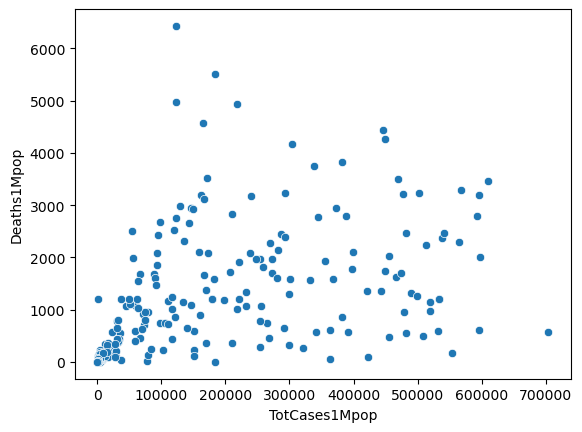

In [9]:
sns.scatterplot(data= df, y = "Deaths1Mpop", x="TotCases1Mpop")

<AxesSubplot:xlabel='TotCases1Mpop', ylabel='SeriousCritical'>

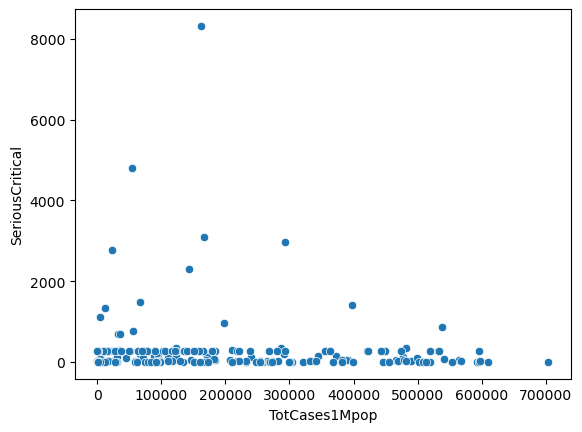

In [10]:
sns.scatterplot(data= df, x = "TotCases1Mpop", y="SeriousCritical")

<AxesSubplot:xlabel='TotalCases', ylabel='TotalRecovered'>

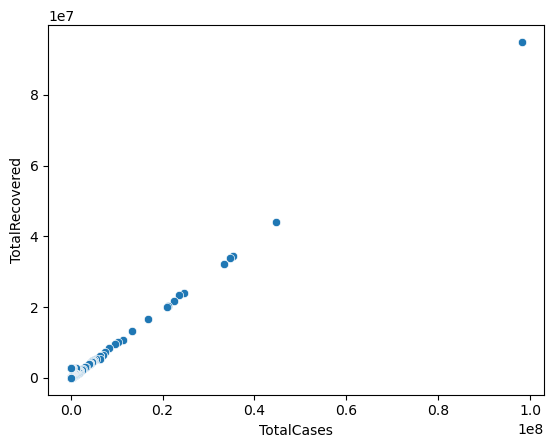

In [11]:
sns.scatterplot(data= df, x = "TotalCases", y="TotalRecovered")



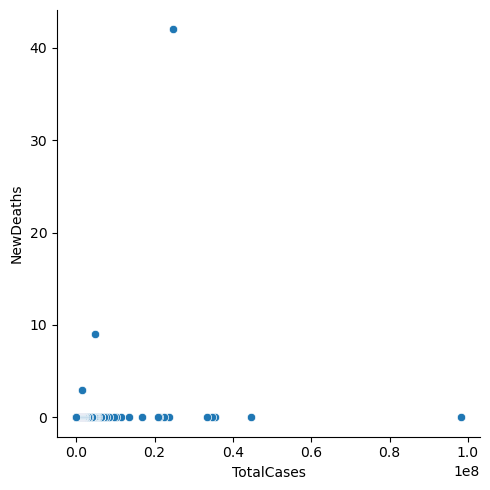

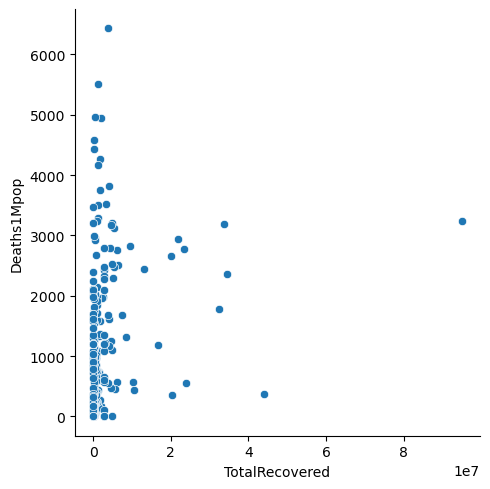

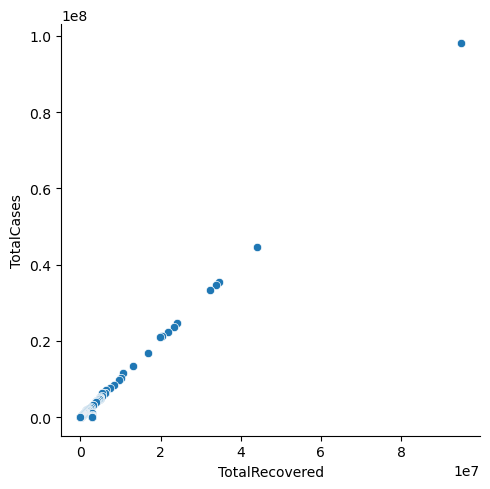

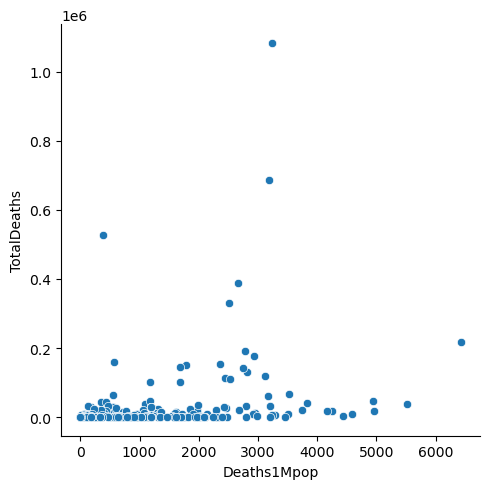

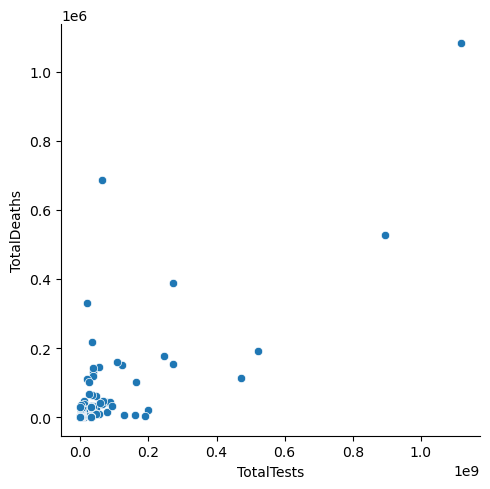

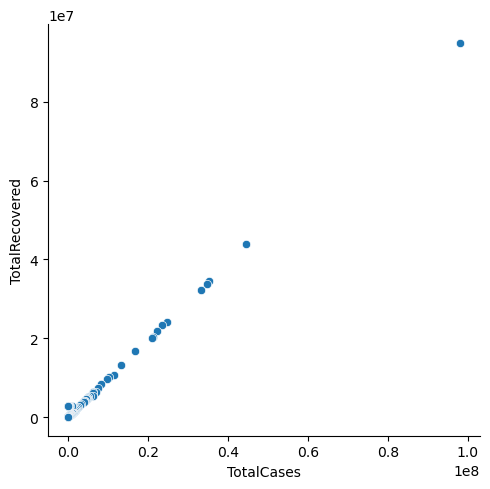

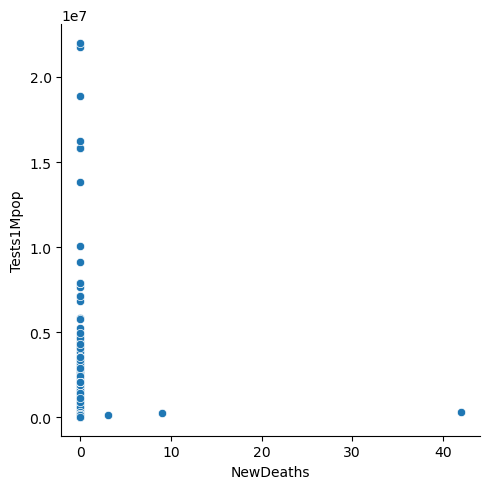

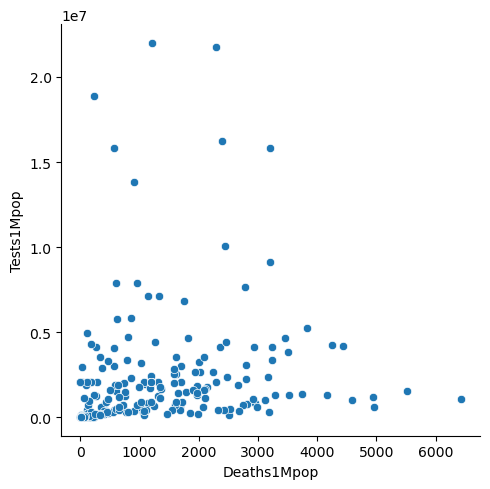

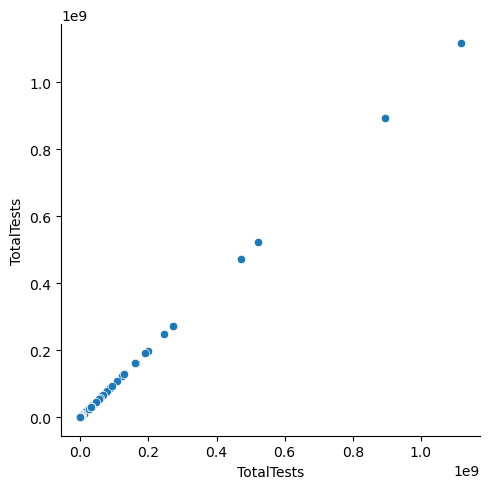

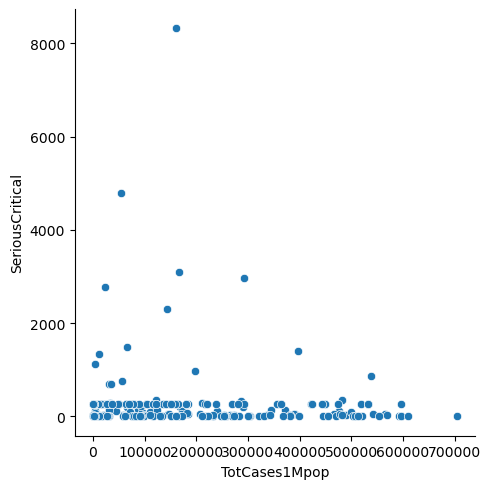

In [12]:
PossibleXColums = ["TotalCases","TotalDeaths","NewDeaths","TotalRecovered","ActiveCases","SeriousCritical","TotCases1Mpop","Deaths1Mpop","TotalTests","Tests1Mpop","Population"]
PossibleYColums = ["TotalCases","TotalDeaths","NewDeaths","TotalRecovered","ActiveCases","SeriousCritical","TotCases1Mpop","Deaths1Mpop","TotalTests","Tests1Mpop","Population"]

for i in range(10):
    sns.relplot(data=df, x = PossibleXColums[randrange(10)], y = PossibleYColums[randrange(10)], kind="scatter")

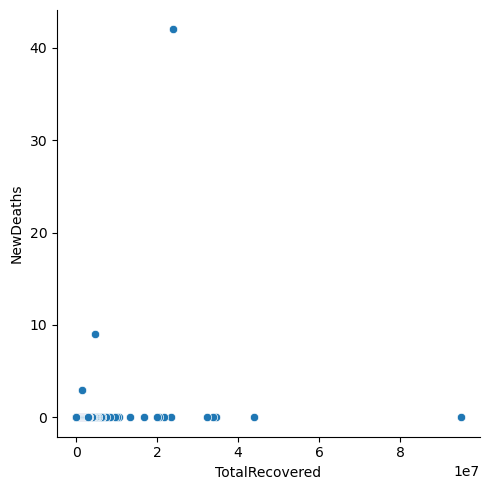

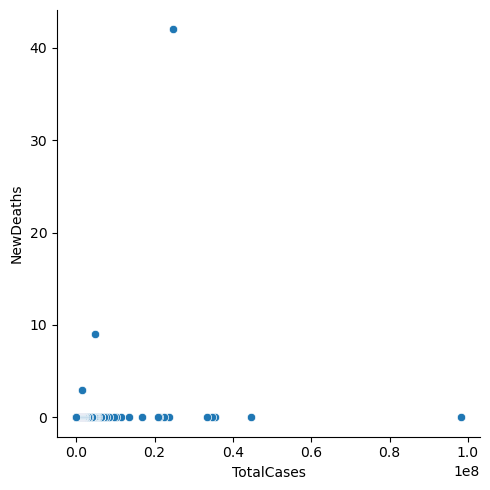

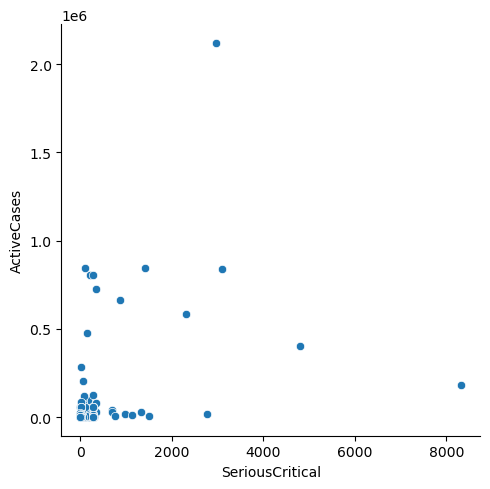

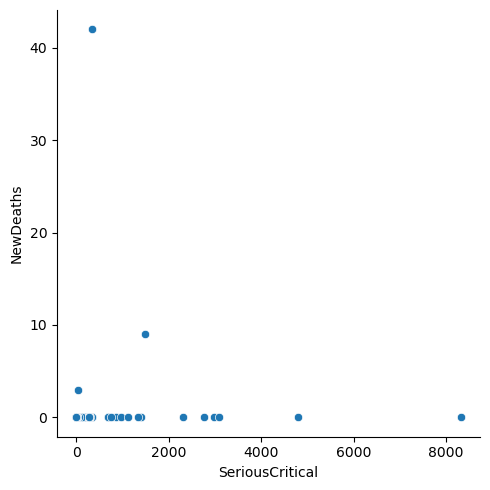

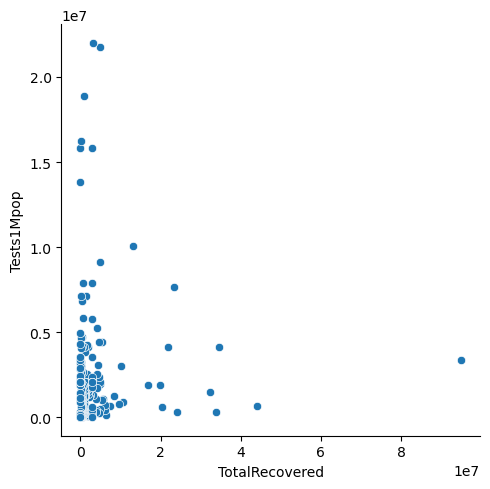

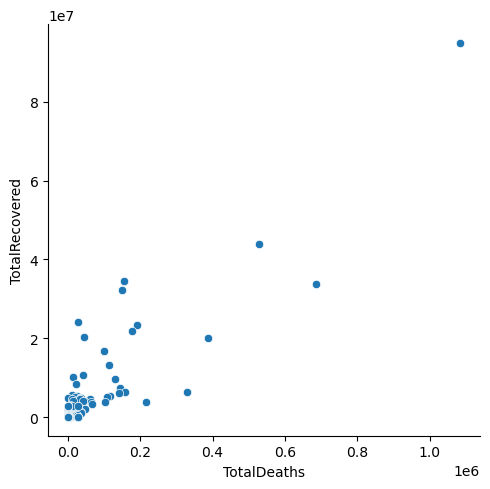

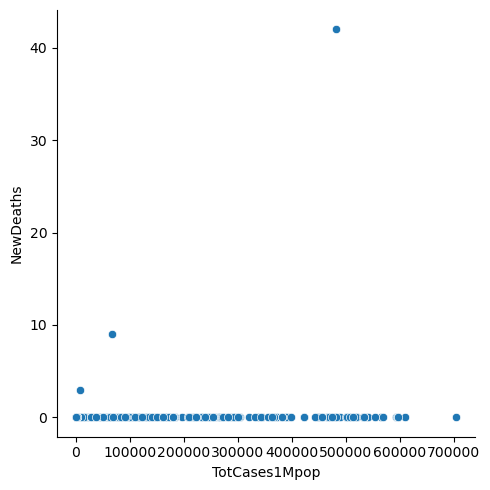

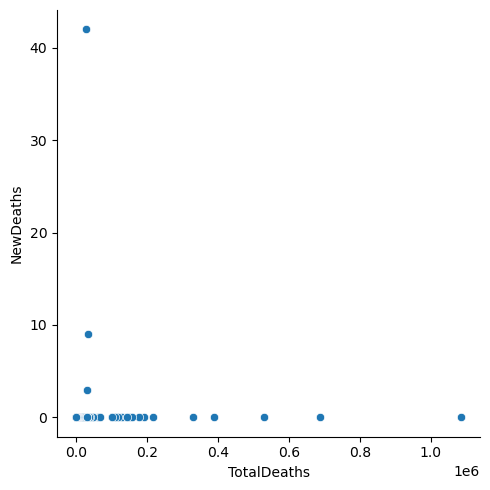

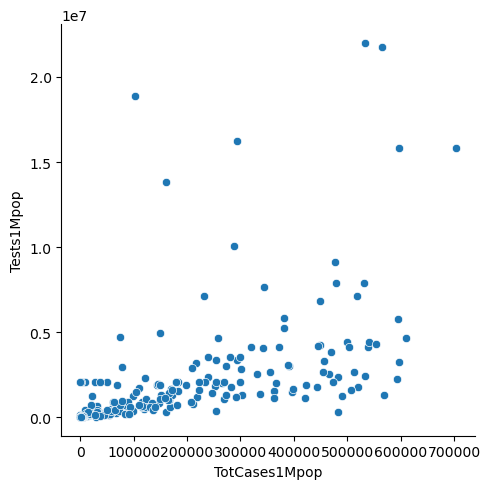

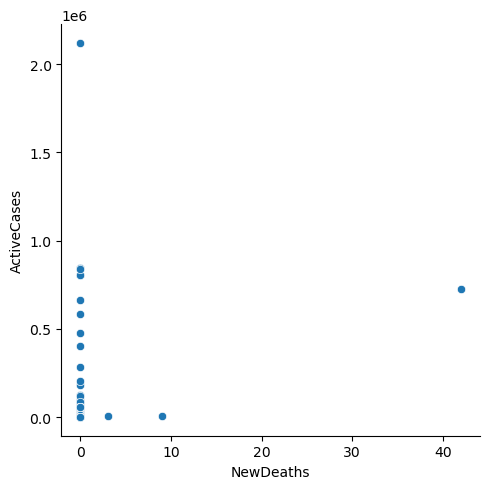

In [13]:
PossibleColums = ["TotalCases","TotalDeaths","NewDeaths","TotalRecovered","ActiveCases","SeriousCritical","TotCases1Mpop","Deaths1Mpop","TotalTests","Tests1Mpop","Population"]

xe = PossibleColums[randrange(10)]
ye = PossibleColums[randrange(10)]

for i in range(10):
    xe = PossibleColums[randrange(10)]
    ye = PossibleColums[randrange(10)]
    if xe == ye:
        xe = PossibleColums[randrange(10)]
        ye = PossibleColums[randrange(10)]
        
    sns.relplot(data=df, x = xe, y = ye, kind="scatter")
    





<AxesSubplot:xlabel='CasesGroup', ylabel='SeriousCritical'>

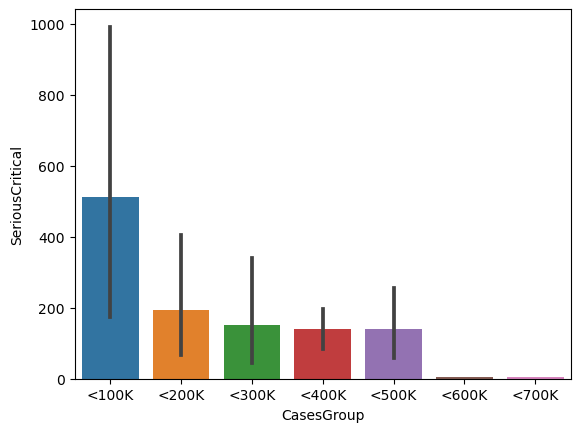

In [20]:
df["CasesGroup"] = pd.cut(
    df["TotCases1Mpop"],
    bins =[100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000 ],
    labels = ["<100K","<200K","<300K","<400K","<500K","<600K","<700K"]
)

sns.barplot(data= df, x = "CasesGroup", y="SeriousCritical")


<AxesSubplot:>

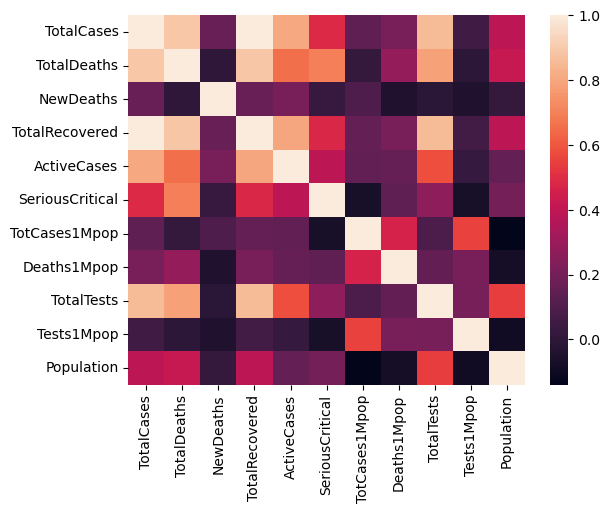

In [21]:
correlations = df.corr()
sns.heatmap(correlations)